In [7]:
#import
import pandas as pd
import os
from openpyxl import load_workbook
import numpy as np
import re
#dataimport

df=pd.read_excel("C:\\Users\\Andris\\Documents\\Szakdoga\\szószok\\inc_monthly_jo.xlsx")
df.index=pd.to_datetime(df.otket)
df.drop(columns="otket", inplace=True)


In [ ]:
#heti alap
dff=pd.DataFrame()
dff["mindegy"]=df.index
dff.index=df.index
dff.resample('W').size()

dff["nap"]=dff.index.weekday
#kétheti páros
#kétheti kereszt

#kétheti bokor

#hajótípus

#időjárás

#milyen időjárási feltételek mellett?


otket
2010-01-24    1
2010-01-31    0
2010-02-07    0
2010-02-14    0
2010-02-21    0
             ..
2024-08-18    0
2024-08-25    1
2024-09-01    1
2024-09-08    0
2024-09-15    2
Freq: W-SUN, Length: 765, dtype: int64

In [32]:
dff.head()
egyhet=0
nyolctizennegy=0
tizenothuszonegy=0
huszonkettotol=0
for x in dff.mindegy:
    a=str(x)
    a=a[8:-9]
    a=int(a)
    if int(a)>0 and int(a)<8:
        egyhet=egyhet+1
    elif int(a)>7 and int(a)<15:
        nyolctizennegy+=1
    elif int(a)>14 and int(a)<22:
        tizenothuszonegy+=1
    else:
        huszonkettotol+=1

In [ ]:


dff["nap"]=dff.index.weekday

In [ ]:

#héten belül
dff2=pd.DataFrame()
dff2["nap"]=dff["nap"]
h=0
k=0
sze=0
cs=0
p=0
szo=0
v=0
for x in dff2["nap"]:
    if x==0:
        h+=1
    elif x==1:
        k+=1
    elif x==2:
        sze+=1
    elif x==3:
        cs+=1
    elif x==4:
        p+=1
    elif x==5:
        szo+=1
    else:
        v+=1



In [ ]:
#hajótípus
ht=pd.DataFrame()
hh=[]
for x in df['ship type 2']:
    if str(x).startswith("&"):
        hh.append(str(x[1:]))
    else:
        hh.append(str(x).replace("&", " & "))
h2=[]

for x in hh:
    h2.append(str(x).replace("&", " & "))
ht["shipt"]=h2


In [68]:
ht.groupby("shipt").size()

shipt
ACCOMODATION BARGE                         1
BARGE                                      1
BULK CARRIER                             227
CHEMICAL TANKER                           12
CHEMICAL TANKER & TUG BOAT                 1
CONTAINER SHIP                            17
CRUDE OIL TANKER                           2
DRILL SHIP & TUG BOAT                      1
FISHING VESSEL                             1
FLAT TOP DECK CARGO BARGE                  1
FLAT TOP DECK CARGO BARGE & TUG BOAT       1
GENERAL CARGO SHIP                        11
LIVESTOCK VESSEL                           1
LNG TANKER                                 2
LPG TANKER                                 6
OFFSHORE SUPPLY SHIP  & OIL RIG            1
OIL TANKER                                 4
PETROLEUM/CHEMICAL TANKER                  5
PRODUCT TANKER                             6
REEFER VESSEL                              1
SUPPLY VESSEL                              1
SUPPLY VESSEL                              2
SUPP

In [ ]:
#napon belül



In [92]:
#időjárás


#klaszterezés (kivéve időjárási adatokra)

from scipy import stats
df.head()
f=df["temperature_2m"].dropna()
d=stats.gaussian_kde(f, bw_method=None, weights=None)


In [101]:
import statistics
def hl(d):
    d2=[]
    d.dropna(inplace=True)
    hat=statistics.mean(d)
    for x in d:
        if x>hat:
            d2.append("High")
        else:
            d2.append("Low")
    return d2

temp=hl(f)
ccl=hl(df['cloud_cover_low'])
ws10=hl(df['wind_speed_10m'])
ws100=hl(df['wind_speed_100m'])
wg=hl(df['wind_gusts_10m'])
r=hl(df['rain'])

In [105]:
#ábrázolás
def high(d):
    l=0
    for x in d:
        if x=="High":
            l+=1
    return l

hccl=high(ccl)
hws10=high(ws10)
hws100=high(ws100)
hwg=high(wg)
hr=high(r)

lccl=len(ccl)-hccl
lws10=len(ws10)-hws10
lws100=len(ws100)-hws100
lwg=len(wg)-hwg
lr=len(r)-hr

321

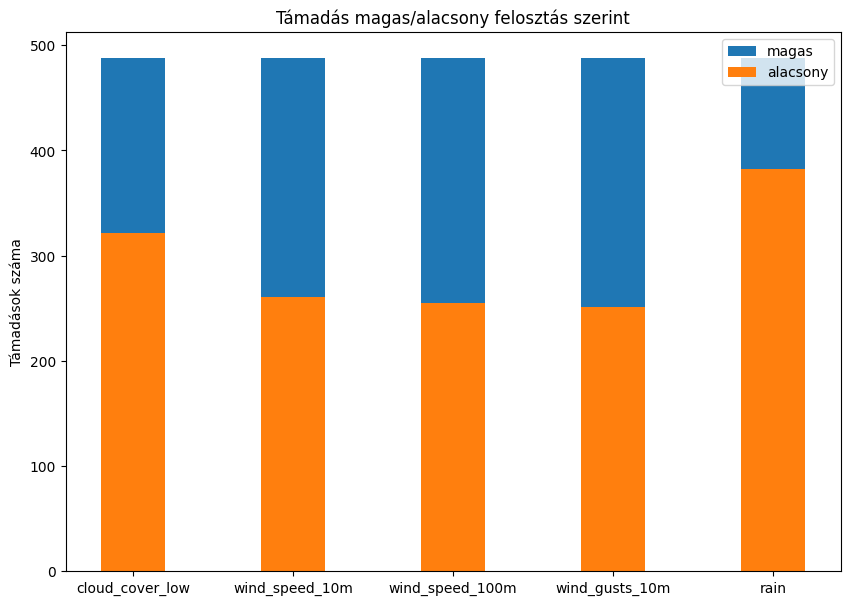

In [ ]:
#időjárás
import matplotlib.pyplot as plt
fig = plt.subplots(figsize =(10, 7))
h=(hccl, hws10, hws100, hwg, hr)
l=(lccl, lws10, lws100, lwg, lr)
p1 = plt.bar(np.arange(5), h, bottom=l, width=0.4)
p2 = plt.bar(np.arange(5), l, width=0.4)

plt.ylabel('Támadások száma')
plt.title('Támadás magas/alacsony felosztás szerint')
plt.xticks(np.arange(5), ('cloud_cover_low', 'wind_speed_10m', 'wind_speed_100m', 'wind_gusts_10m', 'rain'))

plt.legend((p1[0], p2[0]), ('magas', 'alacsony'))
plt.show()


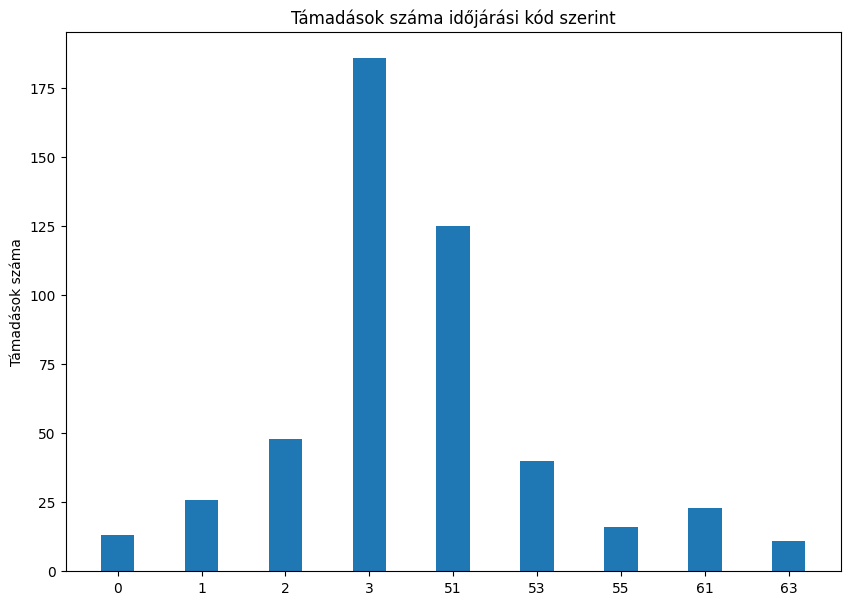

In [134]:
#weather code
dwc=pd.DataFrame()
dwc["wc"]=df.weather_code

dwc=dwc.groupby('wc').size()
dwc.index
a=[]
for x in dwc.index:
    a.append(int(x))


fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(np.arange(len(dwc)), dwc,  width=0.4)

plt.ylabel('Támadások száma')
plt.title('Támadások száma időjárási kód szerint')
plt.xticks(np.arange(len(dwc)), a)

plt.show()


In [138]:

df.head()
ora=pd.DataFrame()
ora["ido"]=df[6]
i2=[]
for x in ora.ido:
    a=str(x)
    p=int(a[2:-4])
    o=int(a[:2])
    
    if p>30:
        o=o+1
    i2.append(o)

ora["ido2"]=i2
ora=ora.groupby("ido2").size()
    

#hajótípus

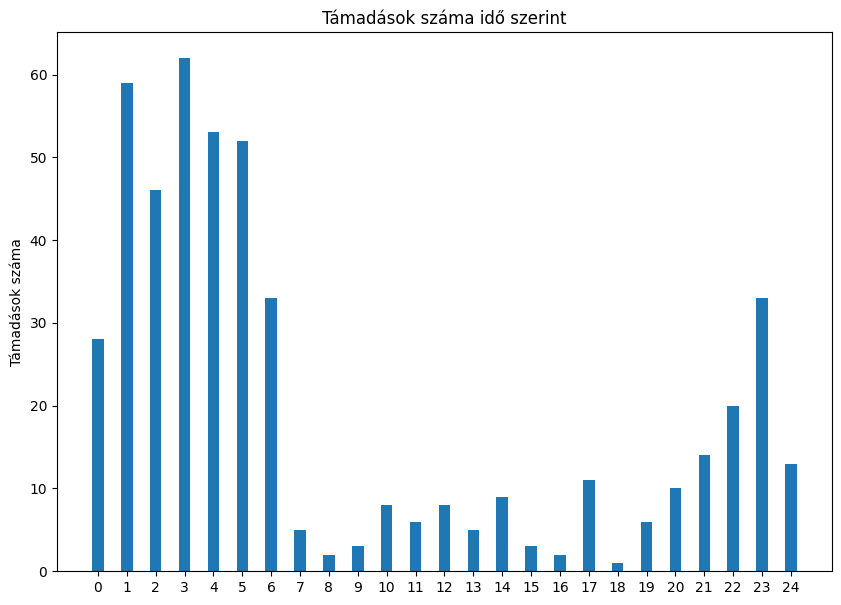

In [141]:

a=[]
for x in dwc.index:
    a.append(int(x))


fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(np.arange(len(ora)), ora,  width=0.4)

plt.ylabel('Támadások száma')
plt.title('Támadások száma idő szerint')
plt.xticks(np.arange(len(ora)), ora.index)

plt.show()


In [ ]:
#hajótípus
a=ht.groupby("shipt").size()
#hét napja

#hét


shipt
ACCOMODATION BARGE                         1
BARGE                                      1
BULK CARRIER                             227
CHEMICAL TANKER                           12
CHEMICAL TANKER & TUG BOAT                 1
CONTAINER SHIP                            17
CRUDE OIL TANKER                           2
DRILL SHIP & TUG BOAT                      1
FISHING VESSEL                             1
FLAT TOP DECK CARGO BARGE                  1
FLAT TOP DECK CARGO BARGE & TUG BOAT       1
GENERAL CARGO SHIP                        11
LIVESTOCK VESSEL                           1
LNG TANKER                                 2
LPG TANKER                                 6
OFFSHORE SUPPLY SHIP  & OIL RIG            1
OIL TANKER                                 4
PETROLEUM/CHEMICAL TANKER                  5
PRODUCT TANKER                             6
REEFER VESSEL                              1
SUPPLY VESSEL                              1
SUPPLY VESSEL                              2
SUPP

([<matplotlib.patches.Wedge at 0x1df66907dd0>,
 [Text(2.1999551501786936, 0.014047676044184628, ''),
  Text(2.1995963625800203, 0.04214073711677821, ''),
  Text(0.21039450121810685, 2.1899164718904656, 'BULK CARRIER'),
  Text(-2.1783282978508396, 0.3080354310501699, 'CHEMICAL TANKER'),
  Text(-2.1963681562741653, 0.12636028689752335, ''),
  Text(-2.196368146661712, -0.1263604539790708, 'CONTAINER SHIP'),
  Text(-2.1649311686919517, -0.3912454917645723, ''),
  Text(-2.1570397047610697, -0.43264270718952264, ''),
  Text(-2.1513388098413433, -0.46015358878360624, ''),
  Text(-2.1452870560936756, -0.48758942457453913, ''),
  Text(-2.138885430490094, -0.5149457400903577, ''),
  Text(-2.0931908056695314, -0.6771648625412703, 'GENERAL CARGO SHIP'),
  Text(-2.0352125057953248, -0.8354101126119525, ''),
  Text(-2.0188369213111304, -0.8742410909760521, ''),
  Text(-1.971564196334814, -0.976183701836217, 'LPG TANKER'),
  Text(-1.9259766675880565, -1.0633032850068722, ''),
  Text(-1.89105310520613

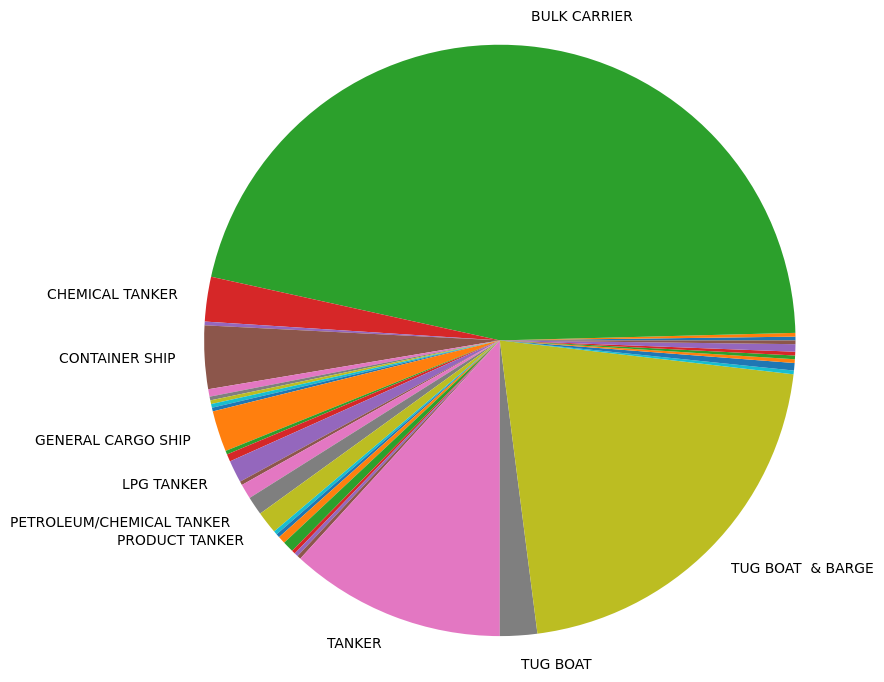

In [153]:
labels = a.index
sizes = a
l2=[]
for x, y in zip(labels, sizes):
    if y<5:
        l2.append("")
    else:
        l2.append(x)

fig, ax = plt.subplots()
ax.pie(sizes, labels=l2, radius=2)
#, autopct='%1.1f%%'

14


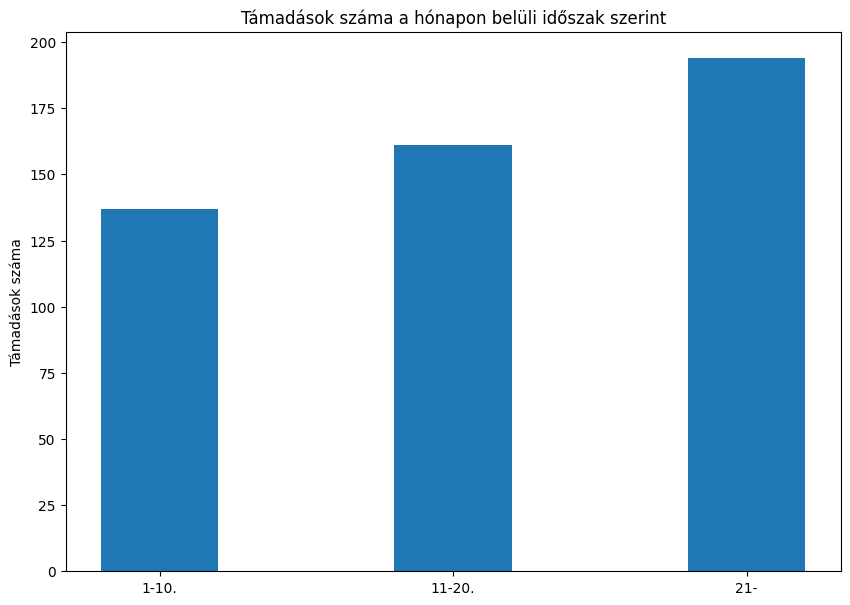

In [ ]:


dff=pd.DataFrame()
dff["mindegy"]=df.index
dff.index=df.index
a=dff.resample('W').size()

egyhet=0
nyolctizennegy=0
v=0
for x in dff.mindegy:
    a=str(x)
    a=a[8:-9]
    a=int(a)
    if int(a)>0 and int(a)<11:
        egyhet=egyhet+1
    elif int(a)>10 and int(a)<21:
        nyolctizennegy+=1
    else:
        v+=1

print(a)
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(np.arange(3), (egyhet, nyolctizennegy, v),  width=0.4)

plt.ylabel('Támadások száma')
plt.title('Támadások száma a hónapon belüli időszak szerint')
plt.xticks(np.arange(3), ('1-10.', '11-20.', '21-'))
plt.show()

In [175]:
print(egyhet, nyolctizennegy, v)

137 161 194


In [167]:
#hét napja
dff=pd.DataFrame()
dff["mindegy"]=df.index
dff.index=df.index
dff.resample('W').size()

dff["nap"]=dff.index.weekday
d=dff.groupby("nap").size()
d

nap
0    88
1    45
2    70
3    80
4    65
5    83
6    61
dtype: int64

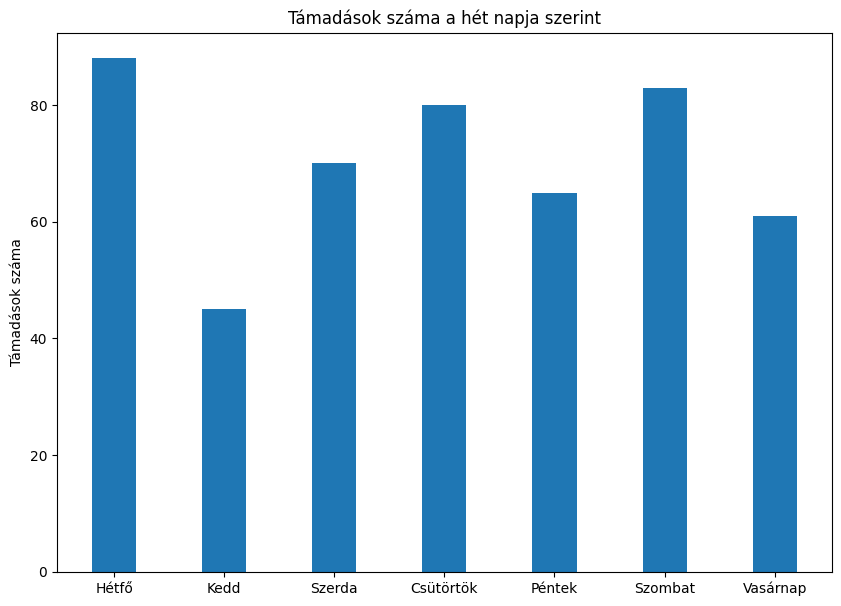

In [170]:
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(np.arange(7), d,  width=0.4)

plt.ylabel('Támadások száma')
plt.title('Támadások száma a hét napja szerint')
plt.xticks(np.arange(7), ('Hétfő', 'Kedd', 'Szerda', 'Csütörtök', 'Péntek', 'Szombat', 'Vasárnap'))
plt.show()

In [171]:
len(df)

492

In [174]:
a=0
for x in df['weather_code']:
    if x==51 or x==3:
        a+=1

print(a)

311


In [177]:
dfff = df[df.index.month == 12]

In [ ]:
dfff3 = df[df.index.month == 1  & df.index.month == 12]

a=dfff3.resample('W').size()
egyhet=0
nyolctizennegy=0
v=0
for x in a.index:
    b=str(x)
    b=b[8:-9]
    b=int(b)
    if int(b)>0 and int(b)<11:
        egyhet=egyhet+1
    elif int(b)>10 and int(b)<21:
        nyolctizennegy+=1
    else:
        v+=1

print(b)
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(np.arange(3), (egyhet, nyolctizennegy, v),  width=0.4)

plt.ylabel('Támadások száma')
plt.title('Támadások száma a hónapon belüli időszak szerint, Január-December')
plt.xticks(np.arange(3), ('1-10.', '11-20.', '21-'))
plt.show()


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

10


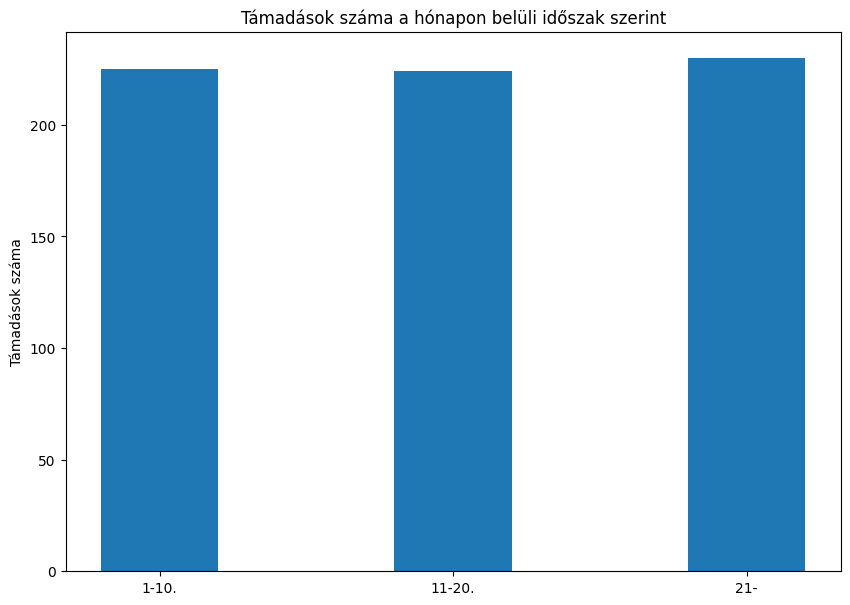

In [ ]:

a=dfff.resample('W').size()
egyhet=0
nyolctizennegy=0
v=0
for x in a.index:
    b=str(x)
    b=b[8:-9]
    b=int(b)
    if int(b)>0 and int(b)<11:
        egyhet=egyhet+1
    elif int(b)>10 and int(b)<21:
        nyolctizennegy+=1
    else:
        v+=1

print(b)
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(np.arange(3), (egyhet, nyolctizennegy, v),  width=0.4)

plt.ylabel('Támadások száma')
plt.title('Támadások száma a hónapon belüli időszak szerint')
plt.xticks(np.arange(3), ('1-10.', '11-20.', '21-'))
plt.show()
